# Trabalho Prático - Gato vs Não-Gato

O relatório deste trabalho será feito diretamente neste notebook pela conveniência de poder explicar todo o processo 

In [2]:
%pip install h5py
%pip install scikit-learn
%pip install matplotlib
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [74]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import sklearn

In [110]:
train: h5py.File = h5py.File("data/train_catvnoncat.h5", "r")
x_train = np.array(train["train_set_x"]).reshape(-1, 64*64*3)
y_train = np.array(train["train_set_y"]).flatten()
conv_x_train = np.array(train["train_set_x"])
conv_y_train = np.array(train["train_set_y"])

test: h5py.File = h5py.File("data/test_catvnoncat.h5", "r")
x_test = np.array(test["test_set_x"]).reshape(-1, 64*64*3)
y_test = np.array(test["test_set_y"]).flatten()
conv_x_test = np.array(test["test_set_x"])

C:\Users\User\AppData\Local\Temp\ipykernel_32132\1964638034.py:2: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  x_train = np.array(train["train_set_x"]).reshape(-1, 64*64*3)
C:\Users\User\AppData\Local\Temp\ipykernel_32132\1964638034.py:3: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  y_train = np.array(train["train_set_y"]).flatten()
C:\Users\User\AppData\Local\Temp\ipykernel_32132\1964638034.py:4: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  conv_x_train = np.array(train["train_set_x"])
C:\Users\User\AppData\Local\Temp\ipykernel_32132\1964638034.py:5: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  conv_y_train = np.array(train["train_set_y"])
C:\Users\User\AppData\L

In [63]:
from sklearn.linear_model import LogisticRegression

linear_model = LogisticRegression(max_iter=300)
linear_model.fit(x_train, y_train)
linear_predictions = linear_model.predict(x_test)

linear_correct_predictions = sum(linear_predictions == y_test)
linear_accuracy = 100 * linear_correct_predictions / len(linear_predictions)
linear_false_positive = sum(linear_predictions > y_test)
linear_false_negative = sum(linear_predictions < y_test)

print(linear_correct_predictions, "/", len(linear_predictions))
print(linear_accuracy, "%")

36 / 50
72.0 %


In [65]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(solver='lbfgs', activation="relu", alpha=0.01, max_iter=200, hidden_layer_sizes=(800), random_state=1)
mlp_model.fit(x_train, y_train)
mlp_predictions = mlp_model.predict(x_test)

mlp_correct_predictions = sum(mlp_predictions == y_test)
mlp_accuracy = 100 * mlp_correct_predictions / len(mlp_predictions)
mlp_false_positive = sum(mlp_predictions > y_test)
mlp_false_negative = sum(mlp_predictions < y_test)

print(mlp_correct_predictions, "/", len(mlp_predictions))
print(mlp_accuracy, "%")

36 / 50
72.0 %


In [66]:

np.random.seed(30)
random_predictions = np.random.randint(0, 2, y_test.shape)
random_correct_predictions = sum(random_predictions == y_test)

print(random_correct_predictions, "/", len(random_predictions))
random_accuracy = 100 * random_correct_predictions / len(random_predictions)
random_false_positive = sum(random_predictions > y_test)
random_false_negative = sum(random_predictions < y_test)

print(random_accuracy, "%")


31 / 50
62.0 %


Epoch 1/50
7/7 [==============================] - 0s 18ms/step - loss: 0.3310 - accuracy: 0.5550 - val_loss: 0.4268 - val_accuracy: 0.3400
Epoch 2/50
7/7 [==============================] - 0s 6ms/step - loss: 0.2840 - accuracy: 0.6555 - val_loss: 0.3474 - val_accuracy: 0.3400
Epoch 3/50
7/7 [==============================] - 0s 6ms/step - loss: 0.2623 - accuracy: 0.6986 - val_loss: 0.3192 - val_accuracy: 0.4600
Epoch 4/50
7/7 [==============================] - 0s 6ms/step - loss: 0.2431 - accuracy: 0.6986 - val_loss: 0.3071 - val_accuracy: 0.5800
Epoch 5/50
7/7 [==============================] - 0s 5ms/step - loss: 0.2414 - accuracy: 0.7273 - val_loss: 0.2884 - val_accuracy: 0.6200
Epoch 6/50
7/7 [==============================] - 0s 6ms/step - loss: 0.2339 - accuracy: 0.7129 - val_loss: 0.2549 - val_accuracy: 0.7200
Epoch 7/50
7/7 [==============================] - 0s 6ms/step - loss: 0.2349 - accuracy: 0.7321 - val_loss: 0.3652 - val_accuracy: 0.3400
Epoch 8/50
7/7 [=================

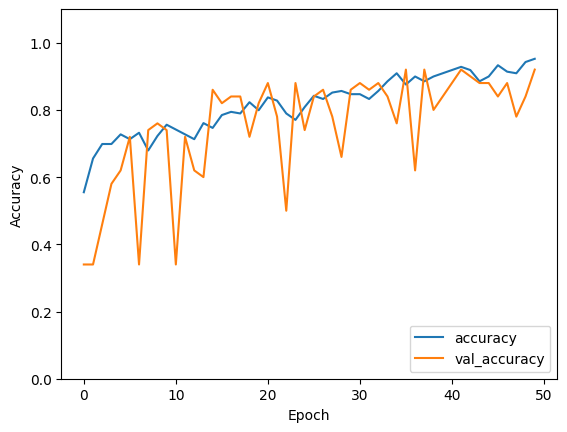

In [109]:
import tensorflow as tf


model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(8, (3,3), activation="tanh", input_shape=(64, 64, 3), kernel_initializer="random_uniform", kernel_regularizer=tf.keras.regularizers.l2(l=0.01)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(5, (5,5), activation="tanh", input_shape=(64, 64, 3), kernel_regularizer=tf.keras.regularizers.l2(l=0.01)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(20, activation='relu', kernel_initializer="random_uniform"),
    tf.keras.layers.Dense(1, activation='relu', kernel_initializer="random_uniform")
],
name="TesteConv"
)

tf.keras.utils.set_random_seed(123)

mse = tf.keras.losses.MeanSquaredError(reduction=tf.keras.losses.Reduction.NONE)
opt = tf.keras.optimizers.SGD(learning_rate=0.1)
model.compile(
    "adam",
    loss="mean_squared_error",
    metrics=['accuracy']
)
model.build(conv_x_train.shape, )
# model.summary()

results = model.fit(
    conv_x_train,
    conv_y_train,
    validation_data=(conv_x_test, y_test),
    epochs=50,
)

conv_predictions = np.round(model.predict(conv_x_test).flatten())
conv_correct_predictions = sum(conv_predictions == y_test)
conv_accuracy = 100 * conv_correct_predictions / len(conv_predictions)
conv_false_positive = sum(conv_predictions > y_test)
conv_false_negative = sum(conv_predictions < y_test)

plt.plot(results.history['accuracy'], label='accuracy')
plt.plot(results.history['val_accuracy'], label='val_accuracy')
plt.ylim([0, 1.1])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [67]:
from IPython.display import Markdown

total_tests = len(y_test)
total_cats  = sum(y_test == 1)
total_non_cats  = total_tests - total_cats

Markdown(
f'''
# Resultados

## Perceptron Simples

|                   | N/M                                       | %
| ------            | ---                                       | -
| Acertos           | {linear_correct_predictions} / {total_tests}| {round(100 * linear_correct_predictions/total_tests, 2)} %
| Falsos Positivos  | {linear_false_positive} / {total_non_cats}  | {round(100 * linear_false_positive/total_non_cats, 2)} %
| Falsos Negativos  | {linear_false_negative} / {total_cats}      | {round(100 * linear_false_negative/total_cats, 2)} %

## Rede de Camada Rasa
|                   | N/M                                       | %
| ------            | ---                                       | -
| Acertos           | {mlp_correct_predictions} / {total_tests}| {round(100 * mlp_correct_predictions/total_tests, 2)} %
| Falsos Positivos  | {mlp_false_positive} / {total_non_cats}  | {round(100 * mlp_false_positive/total_non_cats, 2)} %
| Falsos Negativos  | {mlp_false_negative} / {total_cats}      | {round(100 * mlp_false_negative/total_cats, 2)} %

## Rede Neural Convolucional
|                   | N/M                                       | %
| ------            | ---                                       | -
| Acertos           | {conv_correct_predictions} / {total_tests}| {round(100 * conv_correct_predictions/total_tests, 2)} %
| Falsos Positivos  | {conv_false_positive} / {total_non_cats}  | {round(100 * conv_false_positive/total_non_cats, 2)} %
| Falsos Negativos  | {conv_false_negative} / {total_cats}      | {round(100 * conv_false_negative/total_cats, 2)} %
'''
)


# Resultados

## Perceptron Simples

|                   | N/M                                       | %
| ------            | ---                                       | -
| Acertos           | 36 / 50| 72.0 %
| Falsos Positivos  | 4 / 17  | 23.53 %
| Falsos Negativos  | 10 / 33      | 30.3 %

## Rede de Camada Rasa
|                   | N/M                                       | %
| ------            | ---                                       | -
| Acertos           | 36 / 50| 72.0 %
| Falsos Positivos  | 8 / 17  | 47.06 %
| Falsos Negativos  | 6 / 33      | 18.18 %

## Rede Neural Convolucional
|                   | N/M                                       | %
| ------            | ---                                       | -
| Acertos           | 46 / 50| 92.0 %
| Falsos Positivos  | 0.04 / 17  | 0.24 %
| Falsos Negativos  | 0.04 / 33      | 0.12 %


In [103]:
from ipywidgets import interact

indexes = [i for i in range(len(y_test))]

def get_params(is_cat, name):
    if is_cat:
        return dict(
            s = f"{name}: é gato",
            color = "darkgreen"
        )
    else:
        return dict(
            s = f"{name}: não é gato",
            color = "darkred"
        )

def show_image(index):
    image = conv_x_test[index]

    params = get_params(linear_predictions[index], "Perceptron Simples")
    plt.text(80, 10, **params)

    params = get_params(mlp_predictions[index], "Rede de Camada Rasa")
    plt.text(80, 20, **params)

    params = get_params(conv_predictions[index], "Rede Neural Convolucional")
    plt.text(80, 30, **params)

    plt.imshow(image)
    plt.show()

interact(show_image, index=indexes, fontweight="bold")

interactive(children=(Dropdown(description='index', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,…

<function __main__.show_image(index)>